# DSCI 100 Project

## Introduction


### Background

According to the World Health Organization (WHO), stroke is the second leading cause of death in the world; this makes up approximately 11% of total deaths. Our project explores a dataset involving key characteristics of patients who have and have not suffered from a stroke. We will use data analysis tecniques such as regression and clustering to investigate this information and provide valuable insights that will guide future reasearch into this issue.


### Predictive Question

Our analysis is focused around a key question: Which factors are the strongest predictors of a stroke?


### Data

To clarify the content of our dataset, each row/observation represents a patient and each column represents a health-related characteristic that is hypothesized to be a stroke predictor; both categorical and numerical data are included in this dataset. 

The variables represented in each column are as follows: 
- **id** (patient id)
- **gender** (male/female)
- **age** 
- **hypertension** (1/0) → Interpret as, "Have they had hypertension? 1 is Yes, 0 is No."
- **heart_disease** (1/0) → Interpret as, "Have they had heart disease? 1 is Yes, 0 is No."
- **ever_married** (Yes/No) → Interpret as, "have they been married?"
- **work_type** (Private/Self-employed)
- **Residence_type** (Urban/Rural)
- **avg_glucose_level**
- **bmi** → bmi stands for "Body Mass Index" and is a ratio of body mass to the square of a person's height.
- **smoking_status** (formerly smoked/never smoked)
- **stroke** (1/0) → Interpret as, "Have they had a stroke? 1 is Yes, 0 is No."

The dataset we are using is downloaded from Kaggle:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Methods and results


### Importing Packages

In [198]:
install.packages("tidymodels")
install.packages("GGally")
install.packages("kknn")

options(repr.matrix.max.rows = 6) # limit dataframe row display

library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(broom)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Loading Data

In [199]:
bcancer <- read_csv('data/bcancer_data.csv')

bcancer

New names:
• `` -> `...33`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 568 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...
lgl  (1): ...33

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,...33
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
842302,M,17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.8,1956,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.5,1709,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
926682,M,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,⋯,38.25,155.0,1731,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NA
926954,M,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,⋯,34.12,126.7,1124,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,NA
927241,M,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,⋯,39.42,184.6,1821,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,NA


### Wrangling Data

##### Transform data into a quantitative format

In [200]:
# subtracting 1 from the as.numeric since factor index starts at 1,
# but we want to start at 0 for consistency
# subtracting 1 from the as.numeric since factor index starts at 1,
# but we want to start at 0 for consistency

bcancer_means <- bcancer |>
    select(-id) |>
    select(diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, 'concave points_mean', symmetry_mean, fractal_dimension_mean) |>
    relocate(diagnosis, .after = fractal_dimension_mean) |>
    mutate(diagnosis = as_factor(as.numeric(as_factor(diagnosis)) - 1))

# rename one weird column with space in it
names(bcancer_means)[names(bcancer_means) == 'concave points_mean'] <- "concave_points_mean"
  
bcancer_means

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,0.05533,0
16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,0.05648,0
20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,0.2397,0.07016,0


##### K-Nearest Neighbour Train-Test-Split

In [201]:
bcancer_split <- initial_split(bcancer_means, prop = 0.75, strata = diagnosis)  
bcancer_train <- training(bcancer_split)
bcancer_test  <- testing(bcancer_split)

bcancer_train

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,0
19.69,21.25,130.0,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0
20.29,14.34,135.1,1297,0.1003,0.1328,0.1980,0.1043,0.1809,0.05883,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,1
14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,1
11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,1


### Summary

Information about the dataset that is relevant to exploratory analysis goes here***

In [202]:
set.seed(2019)

bcancer_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |> 
    set_mode("classification")

In [203]:
bcancer_recipe <- recipe(diagnosis ~ ., data = bcancer_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

bcancer_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 10



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [204]:
bcancer_vfold <- vfold_cv(bcancer_train, v = 5, strata = diagnosis)

##### Determine model accuracies through cross-validation

In [205]:
bcancer_k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 2))

bcancer_results <- workflow() |>
    add_recipe(bcancer_recipe) |>
    add_model(bcancer_tune) |>
    tune_grid(resamples = bcancer_vfold, grid = bcancer_k_vals) |>
    collect_metrics()

bcancer_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9110507,5,0.015663781,Preprocessor1_Model01
1,roc_auc,binary,0.9061310,5,0.014392058,Preprocessor1_Model01
3,accuracy,binary,0.9295447,5,0.009790732,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
27,roc_auc,binary,0.9832196,5,0.005097863,Preprocessor1_Model14
29,accuracy,binary,0.9248381,5,0.007147209,Preprocessor1_Model15
29,roc_auc,binary,0.9831028,5,0.004889099,Preprocessor1_Model15


In [206]:
bcancer_accuracies <- bcancer_results |>
    filter(.metric == "accuracy")

bcancer_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9110507,5,0.015663781,Preprocessor1_Model01
3,accuracy,binary,0.9295447,5,0.009790732,Preprocessor1_Model02
5,accuracy,binary,0.9389564,5,0.013486821,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
25,accuracy,binary,0.9248655,5,0.009551599,Preprocessor1_Model13
27,accuracy,binary,0.9271911,5,0.008708646,Preprocessor1_Model14
29,accuracy,binary,0.9248381,5,0.007147209,Preprocessor1_Model15


##### Create a k-nearest neighbours model with the optimal value for K (as shown by the accuracy_vs_k plot in the Visualization section)

In [207]:
bcancer_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) |>
    set_engine("kknn") |> 
    set_mode("classification")

bcancer_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 17
  weight_func = rectangular

Computational engine: kknn 


In [208]:
bcancer_fit <- workflow() |>
    add_recipe(bcancer_recipe) |>
    add_model(bcancer_spec) |>
    fit(data = bcancer_train) # fit on training data to use on test data

bcancer_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(17,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.05868545
Best kernel: rectangular
Best k: 17

##### K-nearest neighbours predictions and summary statistics

In [209]:
bcancer_predictions <- predict(bcancer_fit, bcancer_test) |>
    bind_cols(bcancer_test)

bcancer_predictions

.pred_class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
0,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,14.59,22.68,96.39,657.1,0.08473,0.1330,0.1029,0.03736,0.1454,0.06147,1
1,11.51,23.93,74.52,403.5,0.09261,0.1021,0.1112,0.04105,0.1388,0.06570,1
0,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.2439,0.13890,0.1726,0.05623,0


In [210]:
bcancer_metrics <- bcancer_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class)

bcancer_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9577465
kap,binary,0.9096884


In [211]:
bcancer_conf_mat <- bcancer_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)

bcancer_conf_mat

          Truth
Prediction  0  1
         0 50  3
         1  3 86

### Visualization

##### Pair-plot for `bcancer_means` demonstrates diagnosis clusters


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


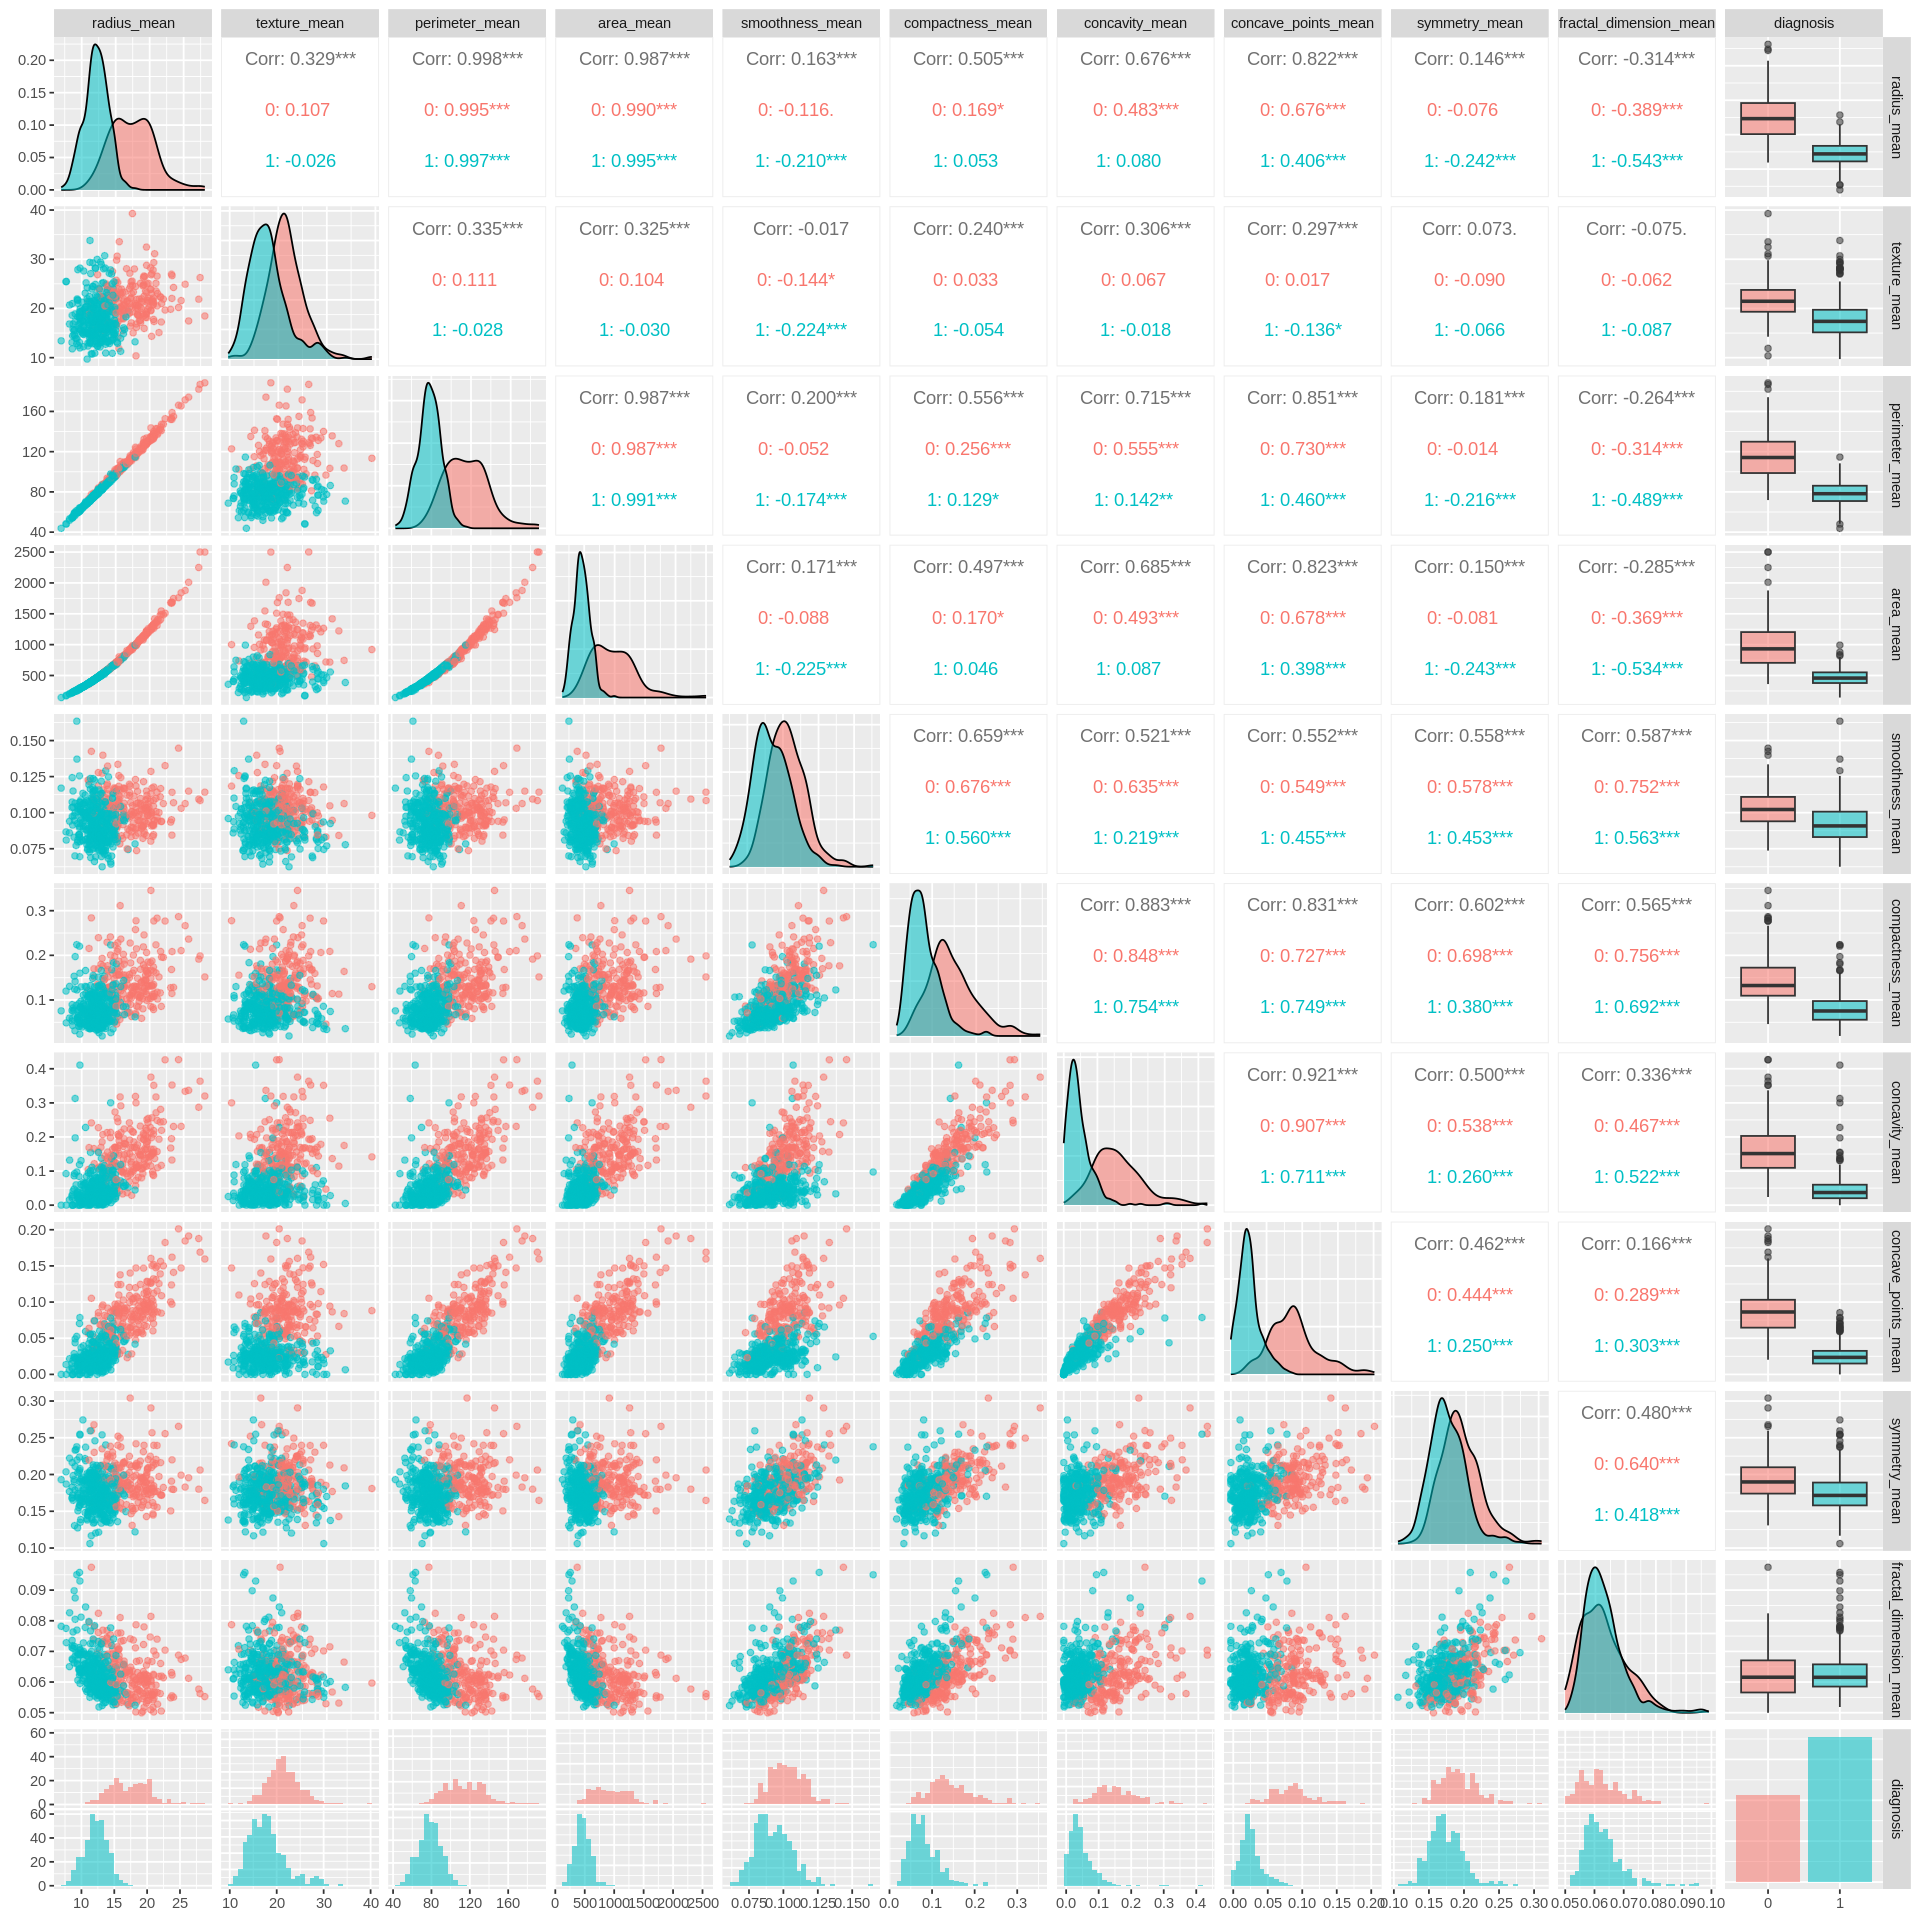

In [212]:
options(repr.plot.height = 16, repr.plot.width = 16)

bcancer_temp_diagnosis <- bcancer_means['diagnosis']

# bin-width for histograms defaults to 30, not necessarily relevant as we are paying attention to the scatter plot diagnoses
bcancer_pairs_plot <- bcancer_means |>
  ggpairs(mapping = aes(color = diagnosis, alpha = 0.4))

bcancer_pairs_plot

##### K-nearest neighbours optimal k-value plot

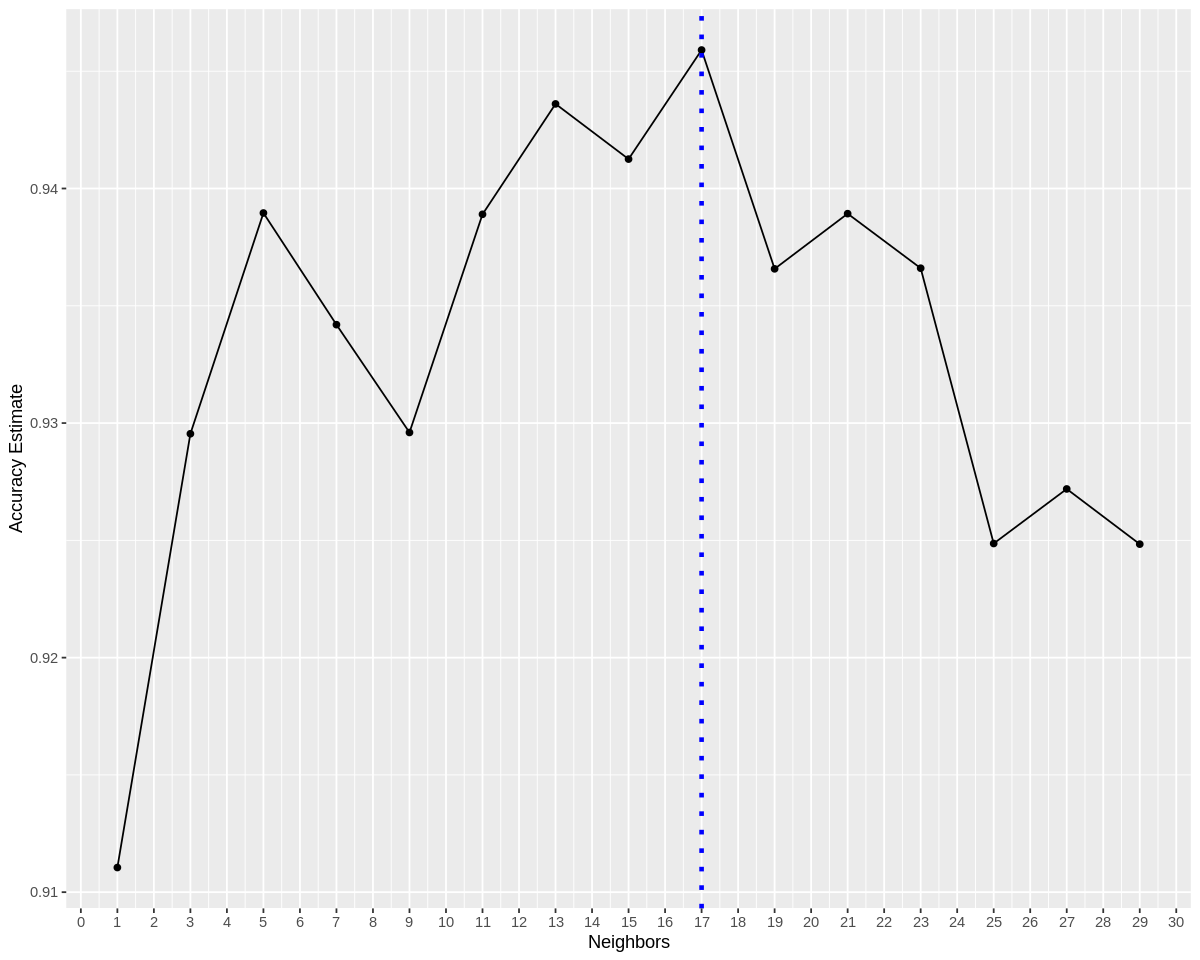

In [213]:
options(repr.plot.height = 8, repr.plot.width = 10)

accuracy_versus_k <- bcancer_accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate") +
        geom_vline(xintercept = 17, linetype = "dotted", color = "blue", size = 1.3) +
        scale_x_continuous(breaks = seq(0, 100, by = 1)) # scale x axis, max set to 100 since it auto decreases for lower values of k

accuracy_versus_k

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


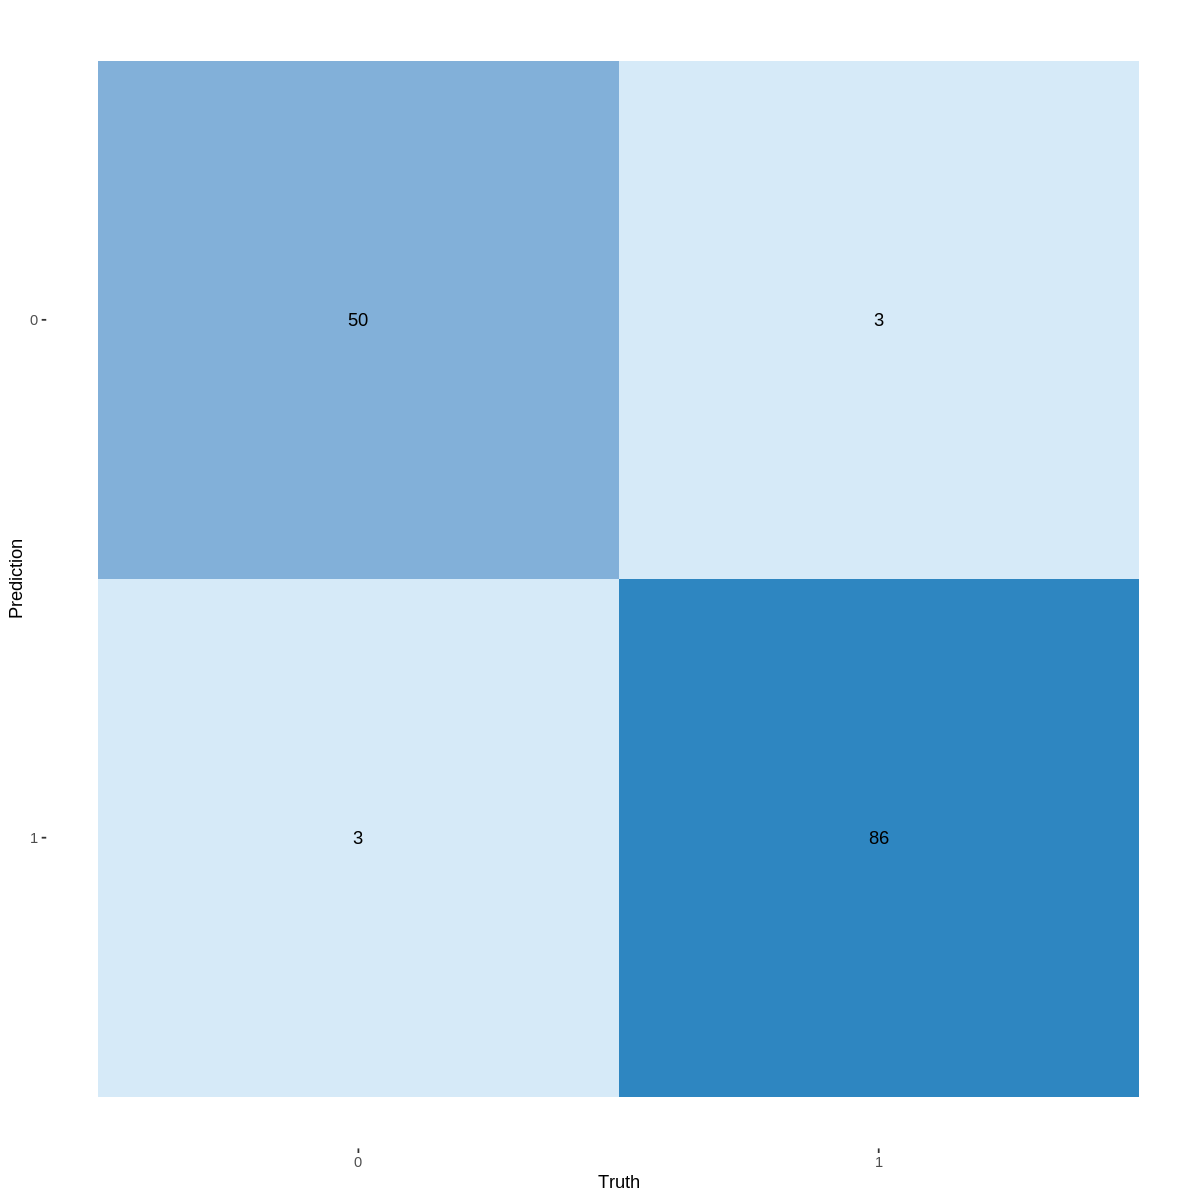

In [214]:
options(repr.plot.height = 10, repr.plot.width = 10)

bcancer_conf_mat_plot <- bcancer_conf_mat |>
  autoplot(type = "heatmap") +
    scale_fill_gradient(low="#D6EAF8", high = "#2E86C1")
  
bcancer_conf_mat_plot

### Analysis

With regards to the `accuracy_versus_k` plot, the value of k with the highest accuracy can be determined to be 17.

## Discussion

***Findings***


***Significance***

## References


-citations for readings and data used to complete the project-